# Preliminary EDA

### An Advanced Persistent Threat (APT) is a type of cyber attack where an attacker gains unauthorized access to a network and remains undetected for an extended period of time. The goal of an APT is usually to steal sensitive information or to disrupt critical systems. APT attacks are usually carried out by well-funded and highly skilled attackers, such as nation-state actors or organized criminal groups.

### The objective of this project is to identify an APT and determine remedial actions

In [21]:
## Import Functions and Spark Config
from pyspark.sql.functions import sum
from pyspark.sql.functions import avg
from pyspark.sql.functions import desc
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
%run ./read_file.ipynb

## Set Environment

In [23]:
# env - dev / prod
# size - small / medium / large
env='prod'
size='small'


## Part 1: Load Data

#### Load bro data (Network Data)

In [34]:
df_bro = readCheckpoint('bro', env)

AnalysisException: Path does not exist: s3a://sapient-bucket-refined/prod/bro/small

In [25]:
df_bro.printSchema()

NameError: name 'df_bro' is not defined

#### Business Glossary for Network Data

| Column Name   | Description                                                                                   |
|---------------|-----------------------------------------------------------------------------------------------|
| ts            | Timestamp                                                           |
| uid           | A unique identifier for each connection                                                        |
| id.orig_h     | IP address of the host that initiated the connection                                          |
| id.orig_p     | Port number used by the host that initiated the connection                                     |
| id.resp_h     | IP address of the host that received the connection                                            |
| id.resp_p     | Port number used by the host that received the connection                                      |
| proto         | Network protocol used for the connection (e.g. TCP, UDP)                                       |
| service       | Service used for the connection (e.g. http, ftp)                                               |
| duration      | Length of time (in seconds) that the connection was active                                     |
| orig_bytes    | Number of bytes transmitted by the host that initiated the connection                         |
| resp_bytes    | Number of bytes transmitted by the host that received the connection                          |
| conn_state    | Current state of the connection                                                               |
| local_orig    | Indicates whether the connection was initiated by a local host                                |
| local_resp    | Indicates whether the connection was received by a local host                                 |
| missed_bytes  | Number of bytes that were lost during transmission                                             |
| history       | Record of the connection history                                                              |
| orig_pkts     | Number of packets transmitted by the host that initiated the connection                       |
| orig_ip_bytes | Number of IP bytes transmitted by the host that initiated the connection                       |
| resp_pkts     | Number of packets transmitted by the host that received the connection                        |
| resp_ip_bytes | Number of IP bytes transmitted by the host that received the connection                        |
| tunnel_parents| Identifies any parent connections for the connection (if any)                                  |


#### Load ecarbro data (Link Data between records in the ecar stream and bro tables)

In [33]:
df_ecarbro = readCheckpoint('ecar-bro', env)

--- 0.6302971839904785 seconds ---


In [27]:
df_ecarbro.printSchema()

root
 |-- action: string (nullable = true)
 |-- actorID: string (nullable = true)
 |-- hostname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- object: string (nullable = true)
 |-- objectID: string (nullable = true)
 |-- pid: integer (nullable = true)
 |-- ppid: integer (nullable = true)
 |-- principal: string (nullable = true)
 |-- tid: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- acuity_level: string (nullable = true)
 |-- bro_uid: string (nullable = true)
 |-- dest_ip: string (nullable = true)
 |-- dest_port: integer (nullable = true)
 |-- direction: string (nullable = true)
 |-- image_path: string (nullable = true)
 |-- l4protocol: string (nullable = true)
 |-- src_ip: string (nullable = true)
 |-- src_port: integer (nullable = true)
 |-- event_minute: integer (nullable = true)
 |-- event_day: integer (nullable = true)
 |-- event_hour: integer (nullable = true)



#### Business Glossary for Link Data


| Column Name  | Description                                                                                     |
|--------------|-------------------------------------------------------------------------------------------------|
| action       | Action performed in the event                                                                   |
| actorID      | Unique ID of the actor who performed the action                                                 |
| hostname     | Hostname of the system where the action was performed                                           |
| id           | ID associated with the event                                                                    |
| object       | Object related to the event                                                                     |
| objectID     | Unique ID of the object related to the event                                                    |
| pid          | Process ID associated with the event                                                            |
| ppid         | Parent process ID associated with the event                                                     |
| principal    | Principal associated with the event                                                              |
| tid          | Thread ID associated with the event                                                              |
| timestamp    | Time when the event occurred                                                                    |
| acuity_level | Acuity level associated with the event                                                           |
| bro_uid      | Bro unique identifier associated with the event                                                 |
| dest_ip      | IP address of the destination of the event                                                       |
| dest_port    | Port number of the destination of the event                                                      |
| direction    | Direction of the event (inbound/outbound)                                                        |
| image_path   | Path of the image associated with the event                                                      |
| l4protocol   | Layer 4 protocol used in the event                                                               |
| src_ip       | IP address of the source of the event                                                            |
| src_port     | Port number of the source of the event                                                           |
| event_minute| Minute of the event
| event_day| Day of the event
| event_hour| Hour of the event

#### Load ecar data (Endpoint Data, e.g. PC, Smartphone, Router, IOT device, etc.)

In [28]:
df_ecar = readCheckpoint('ecar', env, size).cache()

--- 4.522921800613403 seconds ---


In [29]:
df_ecar.printSchema()

root
 |-- action: string (nullable = true)
 |-- actorID: string (nullable = true)
 |-- hostname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- object: string (nullable = true)
 |-- objectID: string (nullable = true)
 |-- pid: integer (nullable = true)
 |-- ppid: integer (nullable = true)
 |-- principal: string (nullable = true)
 |-- tid: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- acuity_level: string (nullable = true)
 |-- base_address: string (nullable = true)
 |-- command_line: string (nullable = true)
 |-- context_info: string (nullable = true)
 |-- data: string (nullable = true)
 |-- dest_port: integer (nullable = true)
 |-- direction: string (nullable = true)
 |-- end_time: timestamp (nullable = true)
 |-- file_path: string (nullable = true)
 |-- image_path: string (nullable = true)
 |-- info_class: string (nullable = true)
 |-- key: string (nullable = true)
 |-- l4protocol: string (nullable = true)
 |-- logon_id: string (nullable 

| Field          | Definition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| action         | The type of action taken, e.g. START, MODIFY, etc.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| actorID        | The ID of the actor responsible for the action.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| hostname       | The hostname of the device where the action occurred.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| id             | The ID of the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| object         | The object associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| objectID       | The ID of the object associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| pid            | The process ID associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| ppid           | The parent process ID associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| principal      | The user or account associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| tid            | The thread ID associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| timestamp      | The timestamp of the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| acuity_level   | The severity of the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| base_address   | The base address of the object associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| command_line   | The command line associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| context_info   | Additional context information associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| data           | Additional data associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| dest_port      | The destination port associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| direction      | The direction of the event (e.g. inbound/outbound).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| end_time       | The end time of the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| file_path      | The file path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| image_path     | The image path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| info_class     | The information class associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| key            | The registry key associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| l4protocol     | The layer 4 protocol associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| logon_id       | The logon ID associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| module_path    | The module path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| new_path       | The new path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| parent_image_path | The parent image path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| path           | The path associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| payload        | The payload associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| privileges     | The privileges associated with the event.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| requesting_domain | The domain of the account that made the request.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| requesting_logon_id | The logon ID of the account
| stack_base | The base address of the stack for the thread that generated the event |
| stack_limit | The limit of the stack for the thread that generated the event |
| start_address | The starting address of the process that generated the event |
| start_time | The time at which the process that generated the event started |
| subprocess_tag | A unique tag that identifies the subprocess that generated the event |
| task_name | The name of the task that generated the event |
| task_pid | The process ID of the task that generated the event |
| task_process_uuid | The UUID of the process that generated the event |
| tgt_pid | The process ID of the target of the event |
| tgt_pid_uuid | The UUID of the target process of the event |
| tgt_tid | The thread ID of the target of the event |
| type | The type of event that was generated |
| user | The user associated with the event |
| user_name | The name of the user associated with the event |
| user_stack_base | The base address of the stack for the user associated with the event |
| user_stack_limit | The limit of the stack for the user associated with the event |
| value | The value associated with the event |
| event_day | The day on which the event occurred |
| event_hour | The hour at which the event occurred |
| event_minute | The minute at which the event occurred |


## Part 2: EDA

#### Network Data (bro)

In [16]:
# Count the number of rows in the DataFrame
print('Total number of rows:', df_bro.count())

# update column names from period to underscore
df_bro = df_bro.withColumnRenamed("id.orig_h", "id_orig_h") \
               .withColumnRenamed("id.orig_p", "id_orig_p") \
               .withColumnRenamed("id.resp_", "id_resp_h") \
               .withColumnRenamed("id.resp_p", "id_resp_p")

# Show the first 5 rows of the DataFrame
df_bro.limit(5).toPandas()

Total number of rows: 1000000


,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1569229902.160783,C5YpaP3EG1o5wZlzd2,142.20.57.68,59819,77.31.181.5,443,tcp,ssl,0.011506,1013,...,SF,F,F,0,ShADadfF,8,1345,8,1228,(empty)
1,1569229902.731024,CTE0AV32kyqDXu11b8,142.20.58.37,58367,86.62.223.5,443,tcp,ssl,0.016421,1141,...,SF,F,F,0,ShADadfF,7,1433,13,10644,(empty)
2,1569229901.914922,CY9kka27oiscS8BlBk,88.232.210.103,46402,142.20.61.158,443,tcp,ssl,0.039084,1023,...,SF,F,F,0,ShADadfF,9,1499,12,8116,(empty)
3,1569229901.953978,C32MZ42jecrtyBex2c,142.20.59.164,50297,165.101.35.5,443,tcp,ssl,0.007827,917,...,SF,F,F,0,ShADadfF,8,1249,8,1084,(empty)
4,1569229901.924342,Cp0EV73HoT13cVkU0f,142.20.57.68,59783,77.31.181.5,443,tcp,ssl,0.038845,949,...,SF,F,F,0,ShADadfF,33,2281,197,247930,(empty)


In [17]:
# Describe the numerical columns of the DataFrame
description = df_bro.select('duration', 'orig_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes').describe()

# Convert the describe dataframe to a pandas dataframe
pandas_df = description.toPandas()

# Set the index to the statistics
pandas_df.set_index('summary', inplace=True)

# Print the pandas dataframe
print(pandas_df)



                    duration         orig_bytes missed_bytes  \
summary                                                        
count                1000000             999902      1000000   
mean     0.45781839208142383  1049.174824132765          0.0   
stddev     5.986019914647287  3821.249823948936          0.0   
min                        -                  0            0   
max                99.993716            2015732            0   

                 orig_pkts       orig_ip_bytes           resp_pkts  \
summary                                                              
count              1000000             1000000             1000000   
mean             10.282347         1503.159897           27.220008   
stddev   12.77868930941242  4039.7019754288954  113.90481994537306   
min                      1                  52                   0   
max                   1672             2080825                7992   

             resp_ip_bytes  
summary                     
co

In [26]:
# Group the DataFrame by protocol and count the number of occurrences for each protocol
print("\033[1mCommentary:\033[0m A protocol is like a set of rules that computers use to talk to each other and send information over the internet. Think of it like a secret code that helps the computers understand each other and send the right information. In our data, we see different types of protocols and will investigate if any protocol is more conducive to malicious activity.")
df_bro.groupBy('proto').count().orderBy(desc('count')).show()

# Group the DataFrame by service and count the number of occurrences for each service
print("\033[1mCommentary:\033[0m Services are used by computers to communicate with each other over the internet.")
df_bro.groupBy('service').count().orderBy(desc('count')).show()

# Find the top 5 host pairs with the highest number of connections
print("\033[1mCommentary:\033[0m Top 5 host pairs with the highest number of connections")
df_bro.groupBy('id_orig_h', 'id_resp_h').count().orderBy(desc('count')).show(5)

# Find the total number of bytes sent and received for each host
print("\033[1mCommentary:\033[0m Total number of bytes sent and received for each host")
df_bro.groupBy('id_orig_h')\
      .agg(sum('orig_bytes').alias('total_orig_bytes'), \
           sum('resp_bytes').alias('total_resp_bytes'))\
      .orderBy('total_orig_bytes', ascending=False)\
      .show()

# Find the average duration of connections for each service
print("\033[1mCommentary:\033[0m Average duration of connections for each service")
df_bro.groupBy('service').agg(avg('duration').alias('avg_duration')).orderBy(desc('avg_duration')).show()


Commentary: A protocol is like a set of rules that computers use to talk to each other and send information over the internet. Think of it like a secret code that helps the computers understand each other and send the right information. In our data, we see different types of protocols and will investigate if any protocol is more conducive to malicious activity.
+-----+------+
|proto| count|
+-----+------+
|  tcp|995775|
|  udp|  4202|
| icmp|    23|
+-----+------+

Commentary: Services are used by computers to communicate with each other over the internet.
+--------+------+
| service| count|
+--------+------+
|     ssl|942229|
|    http| 49922|
|     dns|  4198|
|       -|  3065|
|ssl,smtp|   315|
|smtp,ssl|   271|
+--------+------+

Commentary: Top 5 host pairs with the highest number of connections
+-------------+------------+-----+
|    id_orig_h|   id_resp_h|count|
+-------------+------------+-----+
|142.20.57.186|165.101.35.5| 9159|
| 142.20.56.17|165.101.35.5| 5659|
|142.20.59.10

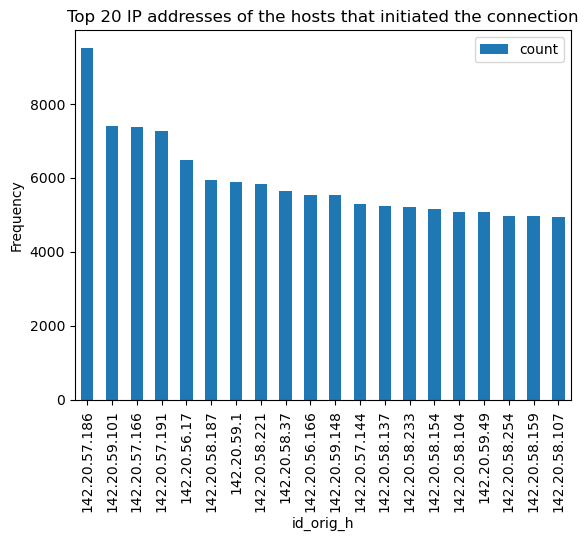

In [32]:
# Group by the data by id_orig_h and count, then sort count
id_orig_h_counts = df_bro.groupBy('id_orig_h').agg(F.count('id_orig_h').alias('count')).orderBy('count', ascending=False)

# Select the top 20 values and output to a Pandas dataframe
top_20_id_orig_h = id_orig_h_counts.limit(20).toPandas()

# Plot a histogram of the top 20 id_orig_h values
top_20_id_orig_h.plot(kind='bar', x='id_orig_h', y='count')

# set the title and axis labels
plt.title('Top 20 IP addresses of the hosts that initiated the connection')
plt.xlabel('Host IP')
plt.ylabel('Frequency')

# display the plot
plt.show()


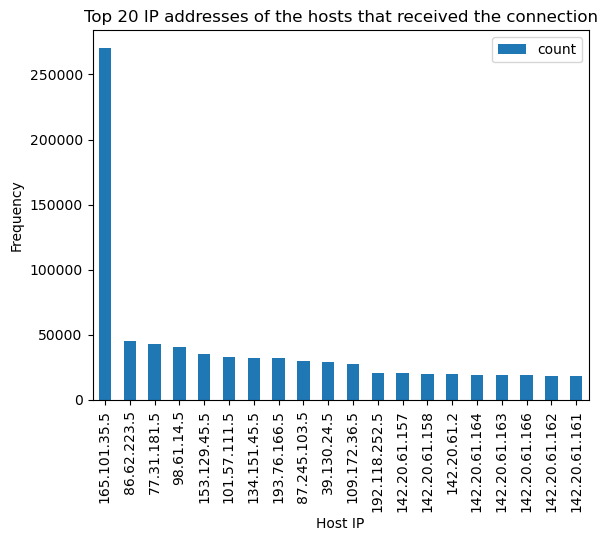

In [33]:
# Group by the data by id_resp_h and count, then sort count
id_resp_h_counts = df_bro.select('id_resp_h').groupBy('id_resp_h').count().orderBy(desc('count'))

# select the top 20 values
top_20_id_resp_h = id_resp_h_counts.limit(20).toPandas()

# plot a histogram of the top 20 id_resp_h values
top_20_id_resp_h.plot(kind='bar', x='id_resp_h', y='count')

# set the title and axis labels
plt.title('Top 20 IP addresses of the hosts that received the connection')
plt.xlabel('Host IP')
plt.ylabel('Frequency')

# display the plot
plt.show()



#### Link Data (ecarbro)

In [19]:
# Count the number of rows in the DataFrame
print('Total number of rows:', df_ecarbro.count())

# Show the first 5 rows of the DataFrame
df_ecarbro.limit(5).toPandas()

Total number of rows: 175840


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,action,actorID,hostname,id,object,objectID,pid,ppid,principal,tid,...,dest_ip,dest_port,direction,image_path,l4protocol,src_ip,src_port,event_minute,event_day,event_hour
0,INFO,c446795c-b73f-458a-9175-dfdfe19f7266,SysClient0003.systemia.com,94734cc3-2451-47b2-887a-3194affc2384,FLOW,18124da7-1115-4f2c-9628-cc91927fd8dd,3708,1760,SYSTEMIACOM\wcaldwell,-1,...,None,NaN,None,None,None,None,NaN,0,23,18
1,INFO,c446795c-b73f-458a-9175-dfdfe19f7266,SysClient0003.systemia.com,3b96029d-81dd-4dbd-b218-5960dea386d2,FLOW,8fd457f9-3ff4-439e-8a3c-cff43a4c81ed,3708,1760,SYSTEMIACOM\wcaldwell,-1,...,None,NaN,None,None,None,None,NaN,0,23,18
2,INFO,c446795c-b73f-458a-9175-dfdfe19f7266,SysClient0003.systemia.com,f1992ec6-05b5-4d53-8f52-4a83d31aacab,FLOW,81c5860c-030b-441c-84ab-e4cd113129b5,3708,1760,SYSTEMIACOM\wcaldwell,-1,...,None,NaN,None,None,None,None,NaN,0,23,18
3,INFO,c446795c-b73f-458a-9175-dfdfe19f7266,SysClient0003.systemia.com,290fbc4d-87ed-4fdc-817c-6f29b6ff1f6a,FLOW,0a799da7-37b3-4f6a-9acb-1ca908464a68,3708,1760,SYSTEMIACOM\wcaldwell,-1,...,None,NaN,None,None,None,None,NaN,0,23,18
4,INFO,c446795c-b73f-458a-9175-dfdfe19f7266,SysClient0003.systemia.com,51619eb9-3932-4196-b3e6-945b7aa4001b,FLOW,18434bf4-f39d-4fcd-9cc4-1b8bd436dd3a,3708,1760,SYSTEMIACOM\wcaldwell,-1,...,None,NaN,None,None,None,None,NaN,0,23,18


In [20]:
# Types of object/action pairs and their count

df_ecarbro.groupBy("object","action").count().show()

+------+------+------+
|object|action| count|
+------+------+------+
|  FLOW|  INFO|175840|
+------+------+------+



#### Endpoint Data (ecarbro)

In [38]:
# Count the number of rows in the DataFrame
pd.options.display.max_columns = None
print('Total number of rows:', df_ecar.count())

# Show the first 5 rows of the DataFrame
df_ecar.limit(5).toPandas()

Total number of rows: 1000000


,action,actorID,hostname,id,object,objectID,pid,ppid,principal,tid,timestamp,acuity_level,base_address,command_line,context_info,data,dest_port,direction,end_time,file_path,image_path,info_class,key,l4protocol,logon_id,module_path,new_path,parent_image_path,path,payload,privileges,requesting_domain,requesting_logon_id,requesting_user,sid,size,src_ip,src_pid,src_port,src_tid,stack_base,stack_limit,start_address,start_time,subprocess_tag,task_name,task_pid,task_process_uuid,tgt_pid,tgt_pid_uuid,tgt_tid,type,user,user_name,user_stack_base,user_stack_limit,value,event_day,event_hour,event_minute
0,START,43c9a912-533a-475c-b3c4-2bfb93892dfd,SysClient0024.systemia.com,66f12aed-8a6f-48b9-a244-3ff5b1da593f,FLOW,7992ee1d-96c2-4afc-8ff9-3a19c7c4e760,916,-1,,NaN,NaT,None,None,None,None,None,NaN,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaT,None,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,NaN
1,START,c9d2265d-1868-4a7f-9767-73b6724b4b77,SysClient0009.systemia.com,89d45da5-12e5-44f6-919f-454839185072,FLOW,3fea8024-1873-4b74-9521-4fe0b4be9afa,912,-1,,NaN,NaT,None,None,None,None,None,NaN,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaT,None,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,NaN
2,START,43c9a912-533a-475c-b3c4-2bfb93892dfd,SysClient0024.systemia.com,134be215-040e-4afc-8f90-8d6ec5abee29,FLOW,ecb96be3-d831-4a25-ab13-05e6f0b9763a,916,-1,,NaN,NaT,None,None,None,None,None,NaN,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaT,None,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,NaN
3,START,c9d2265d-1868-4a7f-9767-73b6724b4b77,SysClient0009.systemia.com,fa37801b-659b-4d4a-9edb-cd889db96343,FLOW,5dae789f-6b8b-4beb-ab74-9226cc6a1ef0,912,-1,,NaN,NaT,None,None,None,None,None,NaN,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaT,None,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,NaN
4,START,43c9a912-533a-475c-b3c4-2bfb93892dfd,SysClient0024.systemia.com,c6e12392-1d80-4c29-aa31-654d409be012,FLOW,4c653859-dce3-4879-9961-28f588eb262e,916,-1,,NaN,NaT,None,None,None,None,None,NaN,None,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaT,None,None,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,NaN,NaN


In [22]:
# Types of object/action pairs and their count

df_ecar.groupBy("object", "action").count().orderBy(desc("count")).show()

+-------+---------+------+
| object|   action| count|
+-------+---------+------+
|   FLOW|    START|606774|
|   FLOW|  MESSAGE|235713|
|   FILE|   MODIFY| 52552|
|   FILE|    WRITE| 32940|
|   FILE|     READ| 30041|
|PROCESS|     OPEN| 17150|
|   FILE|   CREATE| 11908|
|   FILE|   RENAME|  4709|
|   FILE|   DELETE|  2702|
|   FLOW|     OPEN|  1685|
|PROCESS|   CREATE|  1381|
|PROCESS|TERMINATE|  1350|
|  SHELL|  COMMAND|  1095|
+-------+---------+------+



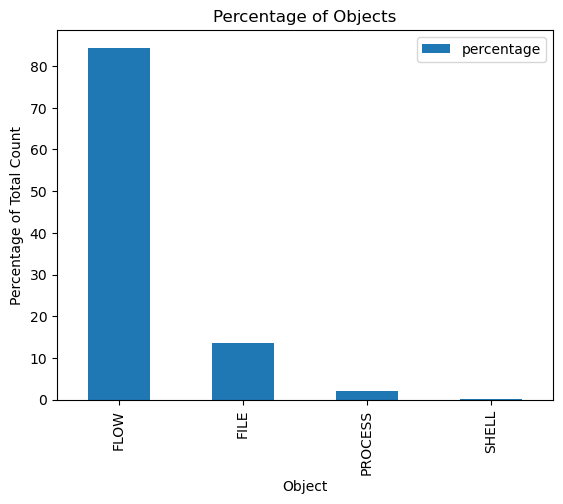

In [41]:
# Group and aggregate data
df_grouped = df_ecar.groupBy("object").agg(F.count("*").alias("count"))

# Calculate percentage of total count
total_count = df_grouped.agg(F.sum("count")).collect()[0][0]
df_grouped = df_grouped.withColumn("percentage", F.round((F.col("count")/total_count)*100, 2))

# Order by count
df_grouped = df_grouped.orderBy(desc("count"))

# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df_grouped.toPandas()

# Plot bar chart
df_pd.plot(x='object', y='percentage', kind='bar')
plt.xlabel('Object')
plt.ylabel('Percentage of Total Count')
plt.title('Percentage of Objects')
plt.show()


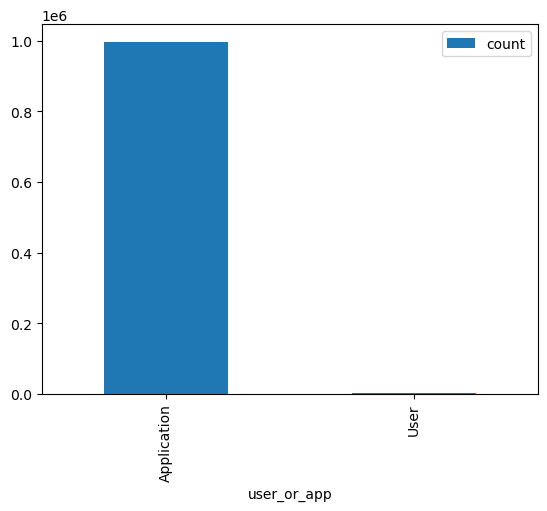

In [43]:
# Create new column for user/application
df_ecar = df_ecar.withColumn('user_or_app', F.when(F.col('user').isNull(), 'Application').otherwise('User'))

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df_ecar.groupBy("user_or_app").count().orderBy(desc("count")).toPandas()

# Plot bar chart
pandas_df.plot(kind="bar", x="user_or_app", y="count")
plt.show()



In [48]:
# Calculate the object and actorID pairs relative to the total number of events

# Compute total count of events
total_count = df_ecar.count()

# Group by object and actorID, and count the number of events
df_grouped = df_ecar.groupBy("object", "actorID").agg(F.count("*").alias("count"))

# Calculate percentage of total count
df_grouped = df_grouped.withColumn("percentage", F.round((F.col("count")/total_count)*100, 2))

# Order by count in descending order and display top 5
df_top_5 = df_grouped.orderBy(F.desc("count")).limit(5)

# Show the result
df_top_5.show()

+------+--------------------+-----+----------+
|object|             actorID|count|percentage|
+------+--------------------+-----+----------+
|  FLOW|dc638440-c1e5-4bf...|44750|      4.48|
|  FLOW|5dfd694f-adf6-45d...|31934|      3.19|
|  FLOW|45b62774-dc52-4ca...|27036|       2.7|
|  FLOW|cc3fed27-1902-426...|20784|      2.08|
|  FLOW|7a4d2279-2d4b-431...|20160|      2.02|
+------+--------------------+-----+----------+



In [35]:
from pyspark.sql.functions import col

# Filter the dataframe where l4protocol is not null and display the first 5 rows
df_ecar.filter(col("l4protocol").isNotNull()).show(5)

+------+-------+--------+---+------+--------+---+----+---------+---+---------+------------+------------+------------+------------+----+---------+---------+--------+---------+----------+----------+---+----------+--------+-----------+--------+-----------------+----+-------+----------+-----------------+-------------------+---------------+---+----+------+-------+--------+-------+----------+-----------+-------------+----------+--------------+---------+--------+-----------------+-------+------------+-------+----+----+---------+---------------+----------------+-----+---------+----------+------------+
|action|actorID|hostname| id|object|objectID|pid|ppid|principal|tid|timestamp|acuity_level|base_address|command_line|context_info|data|dest_port|direction|end_time|file_path|image_path|info_class|key|l4protocol|logon_id|module_path|new_path|parent_image_path|path|payload|privileges|requesting_domain|requesting_logon_id|requesting_user|sid|size|src_ip|src_pid|src_port|src_tid|stack_base|stack_limi

#### Label Data

In [45]:
df_labels = readCheckpoint('labels', env, size)

--- 0.32008862495422363 seconds ---


In [46]:
df_labels.limit(5).toPandas()

,hostname,id,objectID,actorID,timestamp,object,action
0,SysClient0955.systemia.com,3e350ce3-c4b3-4640-92d9-feaea0274cab,83f11800-88a3-4fa9-8c51-a469d66fca16,473d7954-6271-43b8-9984-702378220af2,2019-09-23T14:58:28.051-04:00,SHELL,COMMAND
1,SysClient0955.systemia.com,7a396cde-6485-40b4-baa2-8d7848fa02a3,83f11800-88a3-4fa9-8c51-a469d66fca16,473d7954-6271-43b8-9984-702378220af2,2019-09-23T14:58:33.139-04:00,SHELL,COMMAND
2,SysClient0955.systemia.com,2f33f5e3-1714-4069-850f-863680edbdef,83f11800-88a3-4fa9-8c51-a469d66fca16,473d7954-6271-43b8-9984-702378220af2,2019-09-23T14:58:33.141-04:00,SHELL,COMMAND
3,SysClient0955.systemia.com,725ad9a5-c876-4dc2-9c32-12dc6bb4da66,83f11800-88a3-4fa9-8c51-a469d66fca16,473d7954-6271-43b8-9984-702378220af2,2019-09-23T14:58:33.159-04:00,SHELL,COMMAND
4,SysClient0955.systemia.com,a8a78df2-a996-4c16-90f7-6455091eb91d,83f11800-88a3-4fa9-8c51-a469d66fca16,473d7954-6271-43b8-9984-702378220af2,2019-09-23T14:58:33.158-04:00,SHELL,COMMAND


In [60]:
from pyspark.sql.functions import col

# define the join conditions
join_conditions = [
                   df_ecar.id == df_labels.id]

# perform the left join
joined_df = df_ecar.join(df_labels, join_conditions, how='inner')


joined_df.show()


+------+-------+--------+---+------+--------+---+----+---------+---+---------+------------+------------+------------+------------+----+---------+---------+--------+---------+----------+----------+---+----------+--------+-----------+--------+-----------------+----+-------+----------+-----------------+-------------------+---------------+---+----+------+-------+--------+-------+----------+-----------+-------------+----------+--------------+---------+--------+-----------------+-------+------------+-------+----+----+---------+---------------+----------------+-----+---------+----------+------------+--------+---+--------+-------+---------+------+------+
|action|actorID|hostname| id|object|objectID|pid|ppid|principal|tid|timestamp|acuity_level|base_address|command_line|context_info|data|dest_port|direction|end_time|file_path|image_path|info_class|key|l4protocol|logon_id|module_path|new_path|parent_image_path|path|payload|privileges|requesting_domain|requesting_logon_id|requesting_user|sid|size

In [ ]:
print(joined_df_pd.head(5))